In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score

boston =load_boston()
X = boston.data
Y = boston.target
print(X.shape,Y.shape)


(506, 13) (506,)


In [147]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [148]:
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [149]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [150]:
###Splitting 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=6)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


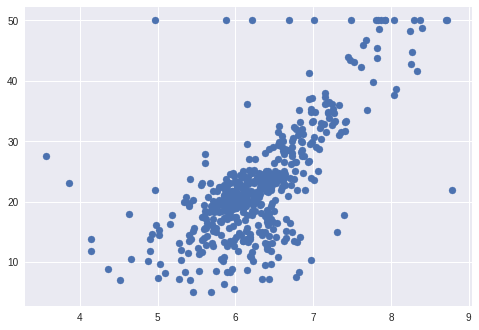

In [151]:
##Normalizing
# Normalise this dataset
# Each feature must have 0 mean, unit variance

u_train = np.mean(X_train,axis=0) 
u_test = np.mean(X_test,axis=0)
std_train = np.std(X_train,axis=0)
std_test = np.std(X_test,axis=0)

X_train = (X_train-u_train)/std_train
X_test = (X_test-u_test)/std_test
#plot feature 5 vs x
plt.style.use('seaborn')
plt.scatter(X[:,5],y)
plt.show()




In [152]:
## To make suitable for Linear reg equation y = theta*x , since coefficien of theta[0] must be 1
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((ones,X_train))
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))
print(X_train.shape ,X_test.shape)


(404, 14) (102, 14)


In [0]:
# X - Matrix ( m x n)
# x - Vector (Single Example with n features)
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/X.shape[0]
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/X.shape[0]

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100


In [154]:
##Time analyse on training 
print(X_train.shape,Y_train.shape)
import time
start = time.time()
theta,error_list = gradient_descent(X_train,Y_train)
end = time.time()
print("Time taken is ", end-start)

(404, 14) (404,)
Time taken is  0.012794017791748047


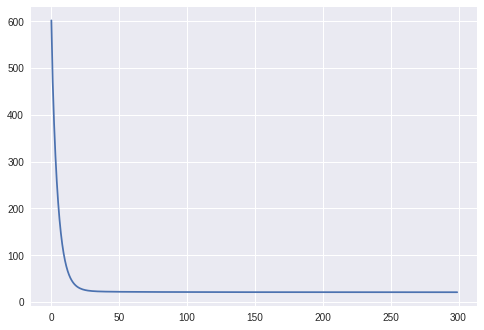

In [155]:
plt.plot(error_list)
plt.show()

In [0]:
##calculation of hypothesis for train , test data 
predicted_train=[]
predicted_test=[]
for i in range(X_train.shape[0]):
    pred = hypothesis(X_train[i],theta)
    predicted_train.append(pred)
predicted_train = np.array(predicted_train)

for i in range(X_test.shape[0]):
    pred = hypothesis(X_test[i],theta)
    predicted_test.append(pred)
predicted_test = np.array(predicted_test)



In [157]:
score_train = r2_score(Y_train , predicted_train)
score_test = r2_score(Y_test , predicted_test)
print(score_train,score_test)

75.12946094237645 66.90588349266756
